# Regularization



Consider the linear regression model

\begin{equation}
y_i=\mathbf{x}_i'\beta+\epsilon_i
\end{equation}
where $\mathbf{x}_i=(x_{i1}, ..., x_{ip})$ with $p$ being the number of regressors.
 Recall the loss function of the OLS-estimator 
 
 \begin{equation}
\boldsymbol{\beta}_{OLS}=\underset{\beta}{argmin}\sum_{i=1}^n (y_i-\mathbf{x}_i'\beta)^2 
 \end{equation}



is an unconstrained maximization problem. Adding additional covariates to the model has little/no costs even if they are (mostly) uninformative. Additionally, adding groups of highly correlated covariates (mostly a problem when $p$ is large), leads to spuriously insignificant results. 

**Topics in Regularization**

- Ridge Regression 
- Lasso


## Ridge Regression


What if we penalize the loss function above with the number and size of the parameters to be estimated in the model? This leads to the idea of Ridge Regression.

 \begin{equation}
 \boldsymbol{\beta}_{R}(s)=\underset{\sum_{j=1}^p\beta_j^2 \leq s}{argmin}\sum_{i=1}^n (y_i-\mathbf{x}_i'\beta)^2 
 \end{equation}
 for any arbitrary $s$ is a constrained maximization problem that can be written as an unconstrained problem with a penalty: 
  \begin{equation}
\boldsymbol{\beta}(\lambda)_{R}=\underset{\beta}{argmin}\left\{\sum_{i=1}^n (y_i-\mathbf{x}_i'\beta)^2 +\lambda \left(\sum_{j=1}^p \beta_j^2\right)\right\}
 \end{equation}

with a one-to-one mapping between $s$ and $\lambda$. 



Setting derivatives equal to zero will result in the normal equations: 
\begin{equation}
\left(\mathbf{X}'\mathbf{X}+ \lambda \mathbf{I} \right)\hat{\boldsymbol{\beta}}_R^*=\mathbf{X}'\mathbf{y}
\end{equation}




- $\left(\mathbf{X}'\mathbf{X}+ \lambda \mathbf{I} \right)$ non-singular for $\lambda>0$ large enough.
- Ridge penalty: $beta_j(\lambda) \rightarrow 0$ when $\lambda \rightarrow \infty$ and also $\beta_j(\lambda) \rightarrow \beta_{j'}^*$ (``shrinking together") for two different coefficients.
- In general: $\mathbb{E}[\boldsymbol{\beta}_R^*] \neq \boldsymbol{\beta}$ if the true model is linear, i.e. there is some bias, but: variances can be smaller, which improves prediction.


This implies that: $\lambda \uparrow$: more bias and less variance. Ridge regression is useful for prediction, but not for model selection, because the probability of selection $\boldsymbol{\beta}_R^*=0$ (i.e. the corner solution) is equal to zero, because of the shape of the constraint region (in the two-dimensional case the constraint region is a circle). 


## The Lasso

The lasso stands for \textbf{L}east \textbf{a}bsolute \textbf{s}hrinkage and \textbf{s}election \textbf{o}perator. The main difference between the lasso and ridge regression lies in the shape of the constraint region. The basic idea is to restrict absolute values of coefficients instead of squared values. 



\begin{equation}
 \boldsymbol{\beta}_{L}(s)=\underset{\beta\in \mathbb{R}^p,\sum_{j=1}^p|\beta_j| \leq s}{argmin}\sum_{i=1}^n (y_i-\mathbf{x}_i'\beta)^2 
 \end{equation}
 for any arbitrary $s$ is a constrained maximization problem that can be written as an unconstrained problem with a penalty: 
 



  \begin{equation}
\boldsymbol{\beta}(\lambda)_{L}=\underset{\beta \in \mathbb{R}^p}{argmin}\left\{\sum_{i=1}^n (y_i-\mathbf{x}_i'\beta)^2 +\lambda \left(\sum_{j=1}^p |\beta_j|\right)\right\}
 \end{equation}

There is no analytical solution because the regression contains the absolute value, which is not differentiable. This means that an optimization algorithm is required, for example gradient descent. The solution will choose some $\beta_j$ to be exactly zero $\rightarrow$ model selection. 


In order to obtain a better intuition about the behavior of ridge regression and the lasso, consider a simple special case with $n = p$, and $\mathbf{X}m$ a diagonal
matrix with 1’s on the diagonal and 0’s in all off-diagonal elements.


To simplify the problem further: assume that there is no intercept. With these assumptions, the usual least squares
problem simplifies to finding $\beta_{1}, \dots, \beta_{p}$

\begin{equation}
\sum_{j=1}^{p}\left(y_{j}-\beta_{j}\right)^{2}
\end{equation}


In this case, the least squares solution is given by 


\begin{equation}
\hat{\beta}_{j}=y_{j}
\end{equation}


In this setting, ridge regression amounts to finding $\beta_{1}, \dots, \beta_{p}$ such that

\begin{equation}
\sum_{j=1}^{p}\left(y_{j}-\beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}
\end{equation}


is minimized, and the lasso amounts to finding the coefficients such that

\begin{equation}
\sum_{j=1}^{p}\left(y_{j}-\beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|
\end{equation}


One can show that in this setting, the ridge regression estimates take the form

\begin{equation}
\hat{\beta}_{j}^{R}=y_{j} /(1+\lambda)
\end{equation}

and the lasso estimates take the form

\begin{equation}
\hat{\beta}_{j}^{L}=\left\{\begin{array}{ll}{y_{j}-\lambda / 2} & {\text { if } y_{j}>\lambda / 2 ;} \\ {y_{j}+\lambda / 2} & {\text { if } y_{j}<-\lambda / 2} \\ {0} & {\text { if }\left|y_{j}\right| \leq \lambda / 2}\end{array}\right.
\end{equation}

We can see that ridge regression and
the lasso perform two very different types of shrinkage: 


- Ridge regression: each least squares coefficient estimate is shrunken by the same **proportion.**
- Lasso: shrinks each least squares coefficient towards zero by
a **constant amount $\lambda/2$**.
- Least squares coefficients that are less than $\lambda/2$: entirely shrunken to zero. 


The type of shrinkage performed by the lasso in this simple setting is known as **soft thresholding.**


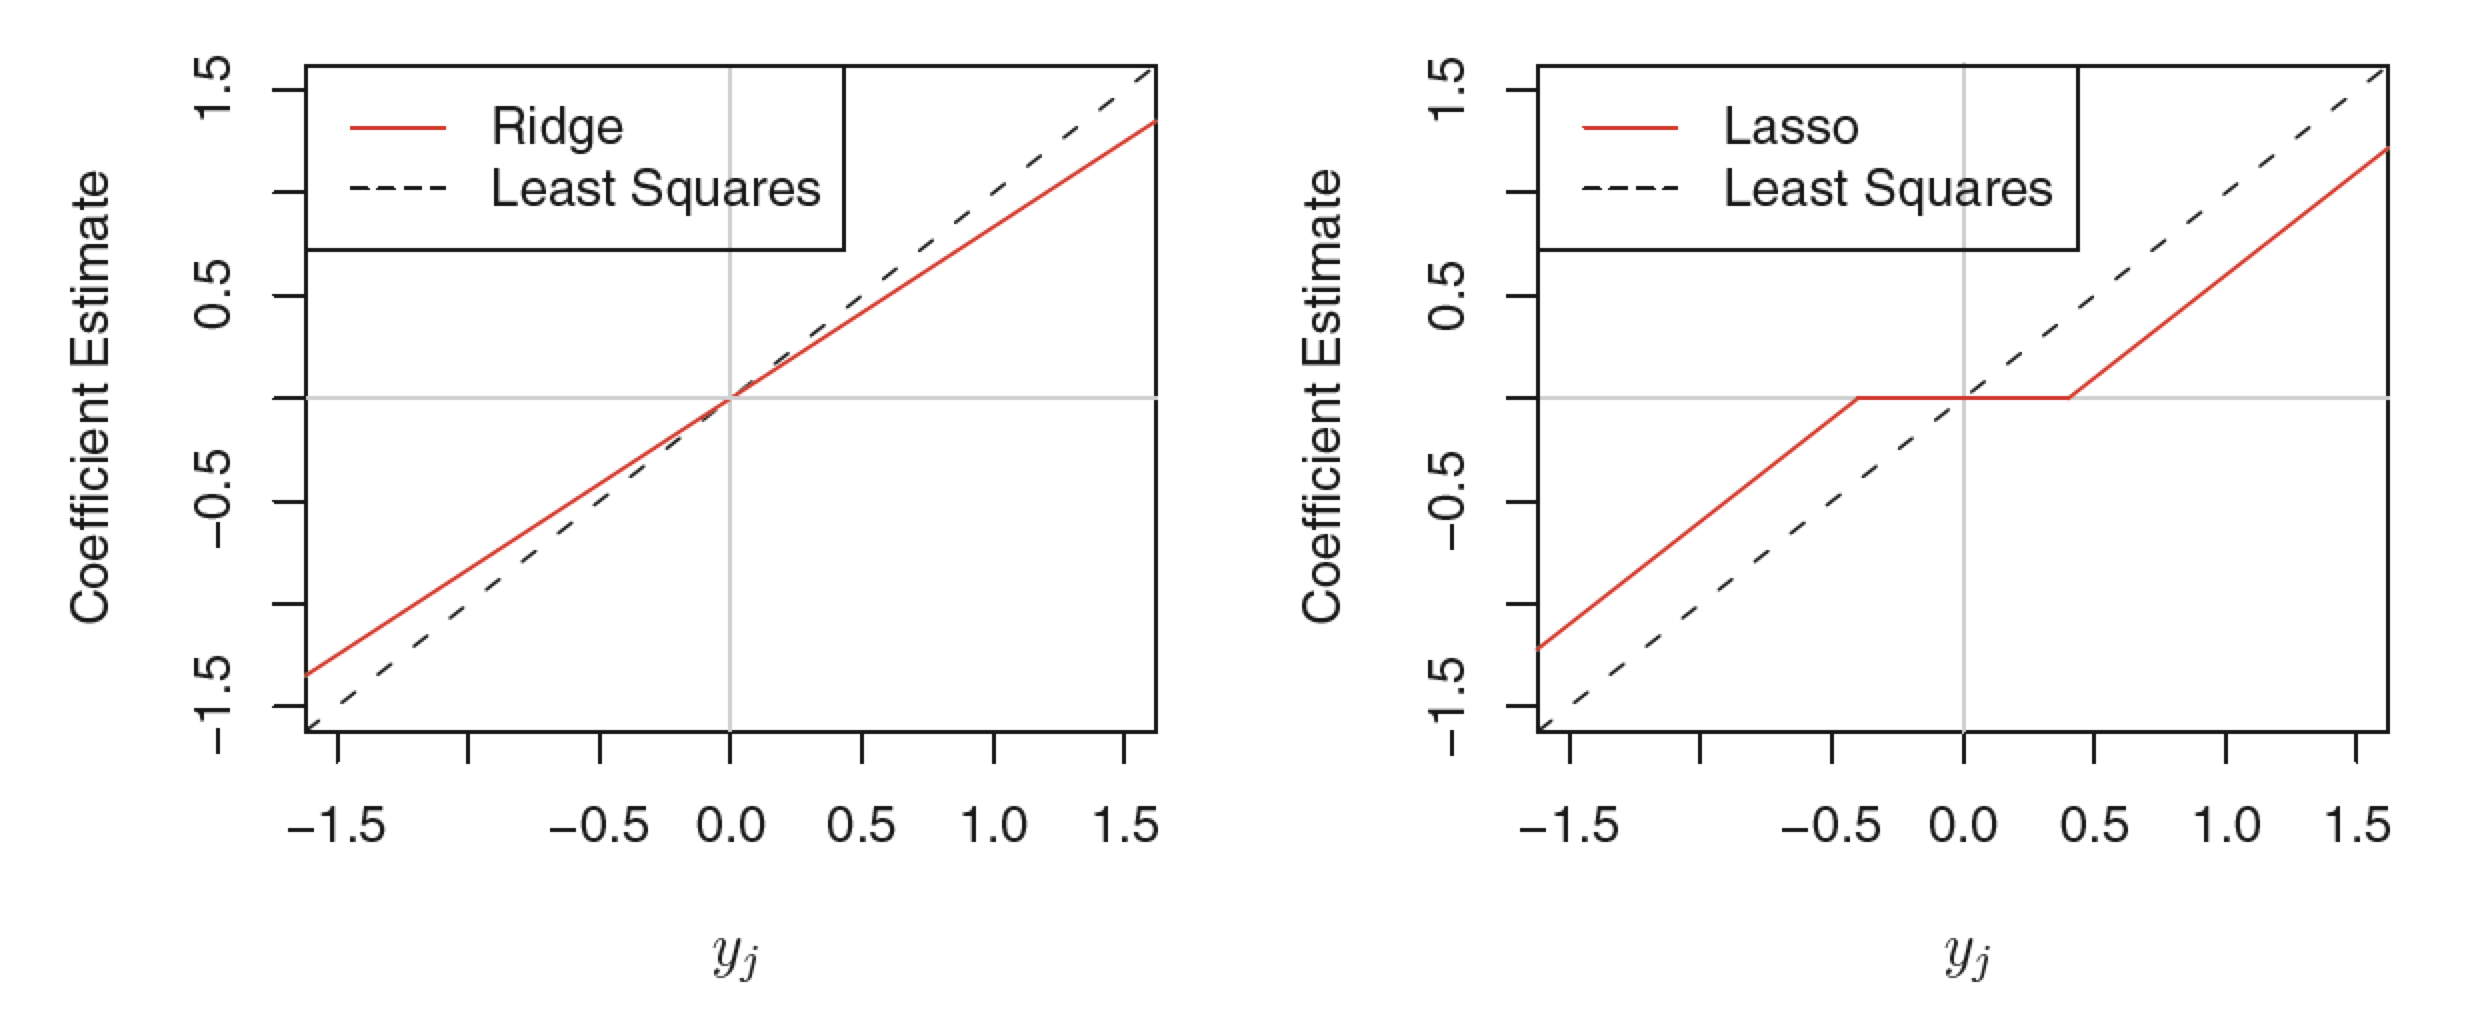

In the case of a more general data matrix $\mathbf{X}$, the story is a little more
complicated, but:  main ideas still
hold approximately:



Ridge regression more or less shrinks every dimension
of the data by the same proportion, whereas the lasso more or less shrinks
all coefficients toward zero by a similar amount, and sufficiently small coefficients
are shrunken all the way to zero.



### How to choose $\lambda$



The bound $s$ in the (constrained) lasso criterion controls the complexity of the model;


- larger values of $s$ free up more parameters and allow the model to adapt more closely to the training data. Conversely, smaller values of t restrict the parameters more, leading to sparser, more interpretable models that fit the data less closely.
- Forgetting about interpretability, we can ask for the value
of $s$ that gives the most accurate model for predicting independent test data
from the same population. Such accuracy is called the generalization ability of
the model. A value of t that is too small can prevent the lasso from capturing
the main signal in the data, while too large a value can lead to overfitting.

There is usually an intermediate value of $s$ that strikes a good
balance between these two extremes, and in the process, produces a model
with some coefficients equal to zero.


__Procedure__:



- apply the lasso to training data for a range of
different $s$ (or $\lambda$) values
- m use each fitted model to predict the responses in the
test set, recording the mean-squared prediction errors for each value of s.
- This process is repeated a total of $K$ times, with each of the $K$ groups getting the
chance to play the role of the test data, with the remaining $K-1$ groups used
as training data. 




In this way: we obtain $K$ different estimates of the prediction
error over a range of values of $s$. These $K$ estimates of prediction error are
averaged for each value of $s$, thereby producing a cross-validation error curve.



By Lagrangian duality: there is a one-to-one correspondence
between the constrained problem and the Lagrangian form for
each value of $s$ in the range where the constraint is active, i.e. there is a corresponding value of $\lambda$  that yields the same solution from the Lagrangian form.



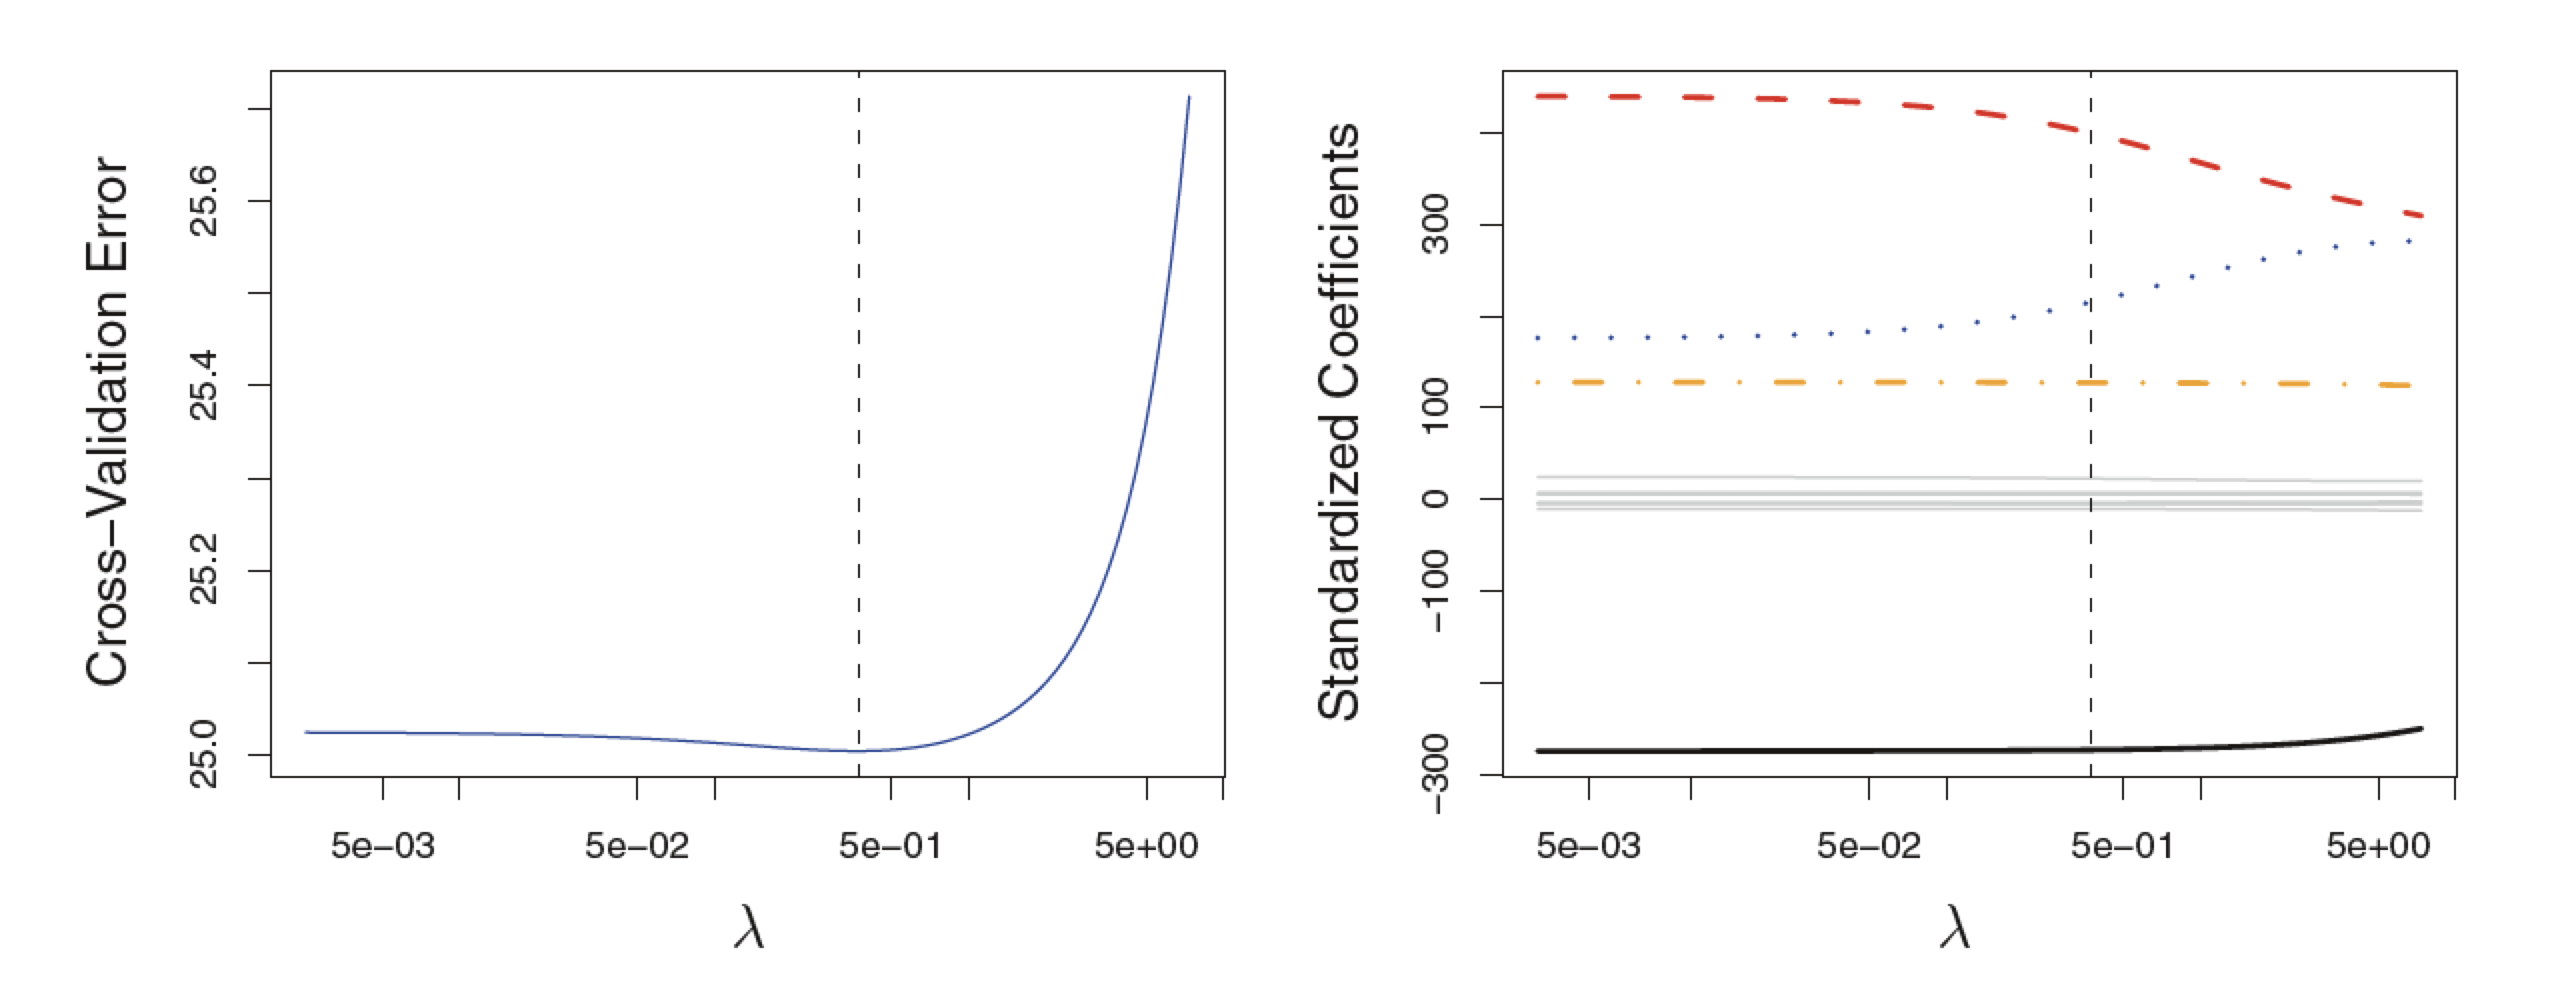

### Computation of the Lasso Solution


The lasso problem is a convex program, specifically a quadratic program (QP) with a convex constraint.

 
 
 A particularly simple and effective computational algorithm, that gives insight into how the lasso works. 
 

 
The maximization criterion in Lagrangian form:

\begin{equation}
\operatorname{minimize}_{\beta \in \mathbb{R}^{p}}\left\{\frac{1}{2 N} \sum_{i=1}^{N}\left(y_{i}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|\right\}
\end{equation}

As before: assume that both $y_i$ and the features $x_{ij}$ have been standardized so that $\frac{1}{N} \sum_{i} y_{i}=0, \frac{1}{N} \sum_{i} x_{i j}=0$ and $\frac{1}{N} \sum_{i} x_{i j}^{2}=1$ 



Let’s first consider a single predictor setting, based on samples $\left\{\left(z_{i}, y_{i}\right)\right\}_{i=1}^{N}$\footnote{for convenience we have given the name $z_i$ to this single $x_{i1}$}

\begin{equation}\label{eq:lasso_ex}
\underset{\beta}{\operatorname{minimize}}\left\{\frac{1}{2 N} \sum_{i=1}^{N}\left(y_{i}-z_{i} \beta\right)^{2}+\lambda|\beta|\right\}
\end{equation}




The standard approach: take the gradient (first derivative) with respect to  $\beta$ and set it to zero. 



However: the absolute value function $|\cdot|$ does not
have a derivative at $\beta= 0$. 



Proceed by direct inspection of the function \ref{eq:lasso_ex}, and find that

\begin{equation}
\widehat{\beta}=\left\{\begin{aligned} \frac{1}{N}\langle\mathbf{z}, \mathbf{y}\rangle-\lambda & \text { if } \frac{1}{N}\langle\mathbf{z}, \mathbf{y}\rangle &>\lambda \\ 0 & \text { if } \frac{1}{N}|\langle\mathbf{z}, \mathbf{y}\rangle| \leq & \lambda \\ \frac{1}{N}\langle\mathbf{z}, \mathbf{y}\rangle+\lambda & \text { if } \frac{1}{N}\langle\mathbf{z}, \mathbf{y}\rangle &<-\lambda \end{aligned}\right.
\end{equation}


which we can write succinctly as 


\begin{equation}
\widehat{\beta}=\mathcal{S}_{\lambda}\left(\frac{1}{N}\langle\mathbf{z}, \mathbf{y}\rangle\right)
\end{equation}




Here the soft-thresholding operator

\begin{equation}
\mathcal{S}_{\lambda}(x)=\operatorname{sign}(x)(|x|-\lambda)_{+}
\end{equation}

translates its argument $x$ toward zero by the amount $\lambda$ and sets it to zero if $|x| \leq \lambda .^{3}$
